# Лабораторна робота 2
## ФБ-24 Воровська Єва

### Постановка задачі

Проаналізувати часові ряди глобальних продуктів по оцінці вегетаційного здоров’я VHI (vegetation health index) http://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/index.php, який надається Національною адміністрацією океанів та атмосфери США NOAA (http://www.noaa.gov/). \
\
Виявити особливості ходу індексу впродовж вегетаційного періоду (вересень року-попередника – липень поточного року) в розрізі областей України. \
\
Додаткові завдання по фільтрації даних від викладача, який веде практику.

### Хід виконання роботи:

~ Створити env в якому будуть встановлені всі необхідні бібліотеки та налаштування для данної лабораторної роботи. \
\
~ Для кожної із адміністративних одиниць України завантажити тестові структуровані файли, що містять значення VHI-індексу. Ця процедура має бути автоматизована, параметром процедури має бути індекс (номер) області. При зберіганні файлу до його імені потрібно додати дату та час завантаження. \
\
~ Зчитати завантажені текстові файли у фрейм (детальніше про роботу із фреймами буде розказано у подальших лабораторних роботах).
Імена стовбців фрейму мають бути змістовними та легкими для сприйняття (не повинно бути спеціалізованих символів, пробілів
тощо). Ця задача має бути реалізована у вигляді окремої процедури, яка на вхід приймає шлях до директорії, в якій зберігаються файли. \
\
~ Реалізувати процедуру, яка змінить індекси областей, які використані на порталі NOAA на наступні: \
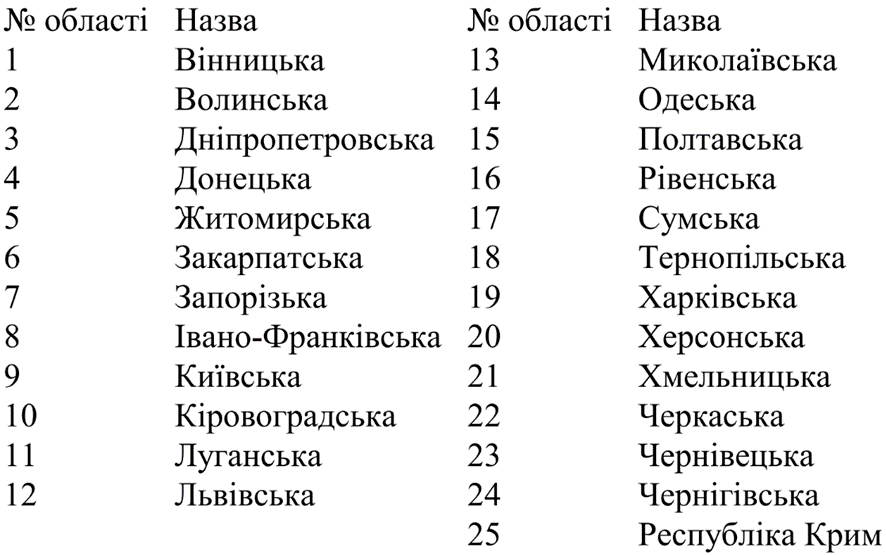
\
\
~ Реалізувати процедури для формування вибірок наступного виду (включаючи елементи аналізу): \
    &nbsp;&nbsp;&nbsp;&nbsp; * Ряд VHI для області за вказаний рік, пошук екстремумів (min та max); \
    &nbsp;&nbsp;&nbsp;&nbsp; * Ряд VHI за вказаний діапазон років для вказаних областей; виявити роки, протягом яких екстремальні посухи торкнулися більше вказаного відсотка областей по Україні (20% областей - 5 областей з 25); \
    &nbsp;&nbsp;&nbsp;&nbsp; * Аналогічно для помірних посух.

### Код:

> Створити env в якому будуть встановлені всі необхідні бібліотеки та налаштування для данної лабораторної роботи.

In [1]:
from urllib.request import urlopen
from datetime import datetime
import pandas as pd
import os
# ^ Завантаження бібліотек ^

> Для кожної із адміністративних одиниць України завантажити тестові структуровані файли, що містять значення VHI-індексу. \
Ця процедура має бути автоматизована, параметром процедури має бути індекс (номер) області. \
При зберіганні файлу до його імені потрібно додати дату та час завантаження.

In [2]:
# Папка для файлів
if not os.path.exists("csv_folder"):
    os.makedirs("csv_folder")
files = os.listdir("csv_folder")

# Отримання/завантаження даних ("i" --> індекс/номер області)
for i in range(1,28):
    url = "https://www.star.nesdis.noaa.gov/smcd/emb/vci/VH/get_TS_admin.php?country=UKR&provinceID={}&year1=1982&year2=2024&type=Mean".format(i)
    text = (urlopen(url)).read()
    # Прибибрання зайвого тексту
    text = text.strip()
    text = text.split(b"\n", 2)[2]
    text = text.replace(b", ", b",")
    text = text.replace(b"<tt><pre>", b"")
    text = text.replace(b"</pre></tt>", b"")
    # Дата та час, що додаються до назви файлу
    load_date = (datetime.today()).strftime("%d-%m-%Y_%H-%M-%S")
    # Видалення старих даних
    for f in files:
        if ("vhi_file_ID"+str(i)+"_") in f:
            ff = os.path.join("csv_folder", f)
            os.remove(ff)
    fname = "vhi_file_ID"+str(i)+"_"+str(load_date)+".csv"
    fpath = os.path.join("csv_folder", fname)
    try:
        out = open(fpath, "wb")
        out.write(text)
        out.close()
        print("Data #{} was downloaded!".format(i))
    except:
        print("Something went wrong with #{}...".format(i))

print("> Finished <")

Data #1 was downloaded!
Data #2 was downloaded!
Data #3 was downloaded!
Data #4 was downloaded!
Data #5 was downloaded!
Data #6 was downloaded!
Data #7 was downloaded!
Data #8 was downloaded!
Data #9 was downloaded!
Data #10 was downloaded!
Data #11 was downloaded!
Data #12 was downloaded!
Data #13 was downloaded!
Data #14 was downloaded!
Data #15 was downloaded!
Data #16 was downloaded!
Data #17 was downloaded!
Data #18 was downloaded!
Data #19 was downloaded!
Data #20 was downloaded!
Data #21 was downloaded!
Data #22 was downloaded!
Data #23 was downloaded!
Data #24 was downloaded!
Data #25 was downloaded!
Data #26 was downloaded!
Data #27 was downloaded!
> Finished <


> Зчитати завантажені текстові файли у фрейм. \
Імена стовбців фрейму мають бути змістовними та легкими для сприйняття (не повинно бути спеціалізованих символів, пробілів тощо). \
Ця задача має бути реалізована у вигляді окремої процедури, яка на вхід приймає шлях до директорії, в якій зберігаються файли.

In [3]:
# Назви стовпців
headers = ["Year", "Week", "SMN", "SMT", "VCI", "TCI", "VHI"]
# Директорія з файлами
files = os.listdir("csv_folder")
ind = 0
dfs = []
for f in files:
    ind = ind+1
    ff = os.path.join("csv_folder", f)
    # Читання файлу
    dff = pd.read_csv(ff, index_col=False, header=None, names=headers)
    # Додавання стовпцю з індексами регіонів
    dff["Area"] = ind
    dfs.append(dff)

# Об'єднання всіх даних в один датафрейм
df = pd.concat(dfs, axis=0, ignore_index=True)
# Відкидання відсутніх даних (NaN / -1)
df = df.drop(df.loc[df["VHI"] == -1].index)
df = df.reset_index(drop=True)
print(df)

       Year  Week    SMN     SMT    VCI    TCI    VHI  Area
0      1982     1  0.059  258.24  51.11  48.78  49.95     1
1      1982     2  0.063  261.53  55.89  38.20  47.04     1
2      1982     3  0.063  263.45  57.30  32.69  44.99     1
3      1982     4  0.061  265.10  53.96  28.62  41.29     1
4      1982     5  0.058  266.42  46.87  28.57  37.72     1
...     ...   ...    ...     ...    ...    ...    ...   ...
57856  2024     5  0.101  275.13  58.55   8.77  33.66    27
57857  2024     6  0.110  276.43  60.83   9.08  34.96    27
57858  2024     7  0.120  277.97  61.35  10.45  35.90    27
57859  2024     8  0.130  279.15  60.18  13.87  37.02    27
57860  2024     9  0.142  280.64  59.61  16.63  38.12    27

[57861 rows x 8 columns]


> Реалізувати процедуру, яка змінить індекси областей, які використані на порталі NOAA на наступні *(див. завдання)*.

*26 – місто Київ* \
*27 – Севастополь*

In [4]:
new_ind = {
    1: 22,
    2: 24,
    3: 23,
    4: 25,
    5: 3,
    6: 4,
    7: 8,
    8: 19,
    9: 20,
    10: 21,
    11: 9,
    12: 26,
    13: 10,
    14: 11,
    15: 12,
    16: 13,
    17: 14,
    18: 15,
    19: 16,
    20: 27,
    21: 17,
    22: 18,
    23: 6,
    24: 1,
    25: 2,
    26: 7,
    27: 5
}
def zmina_ind(old_df, nind):
    new_df = old_df.copy()
    new_df["Area"].replace(nind, inplace=True)
    return new_df

print("Original:\n", df) 
print("^"*60)
print("Changed:\n", zmina_ind(df, new_ind))

Original:
        Year  Week    SMN     SMT    VCI    TCI    VHI  Area
0      1982     1  0.059  258.24  51.11  48.78  49.95     1
1      1982     2  0.063  261.53  55.89  38.20  47.04     1
2      1982     3  0.063  263.45  57.30  32.69  44.99     1
3      1982     4  0.061  265.10  53.96  28.62  41.29     1
4      1982     5  0.058  266.42  46.87  28.57  37.72     1
...     ...   ...    ...     ...    ...    ...    ...   ...
57856  2024     5  0.101  275.13  58.55   8.77  33.66    27
57857  2024     6  0.110  276.43  60.83   9.08  34.96    27
57858  2024     7  0.120  277.97  61.35  10.45  35.90    27
57859  2024     8  0.130  279.15  60.18  13.87  37.02    27
57860  2024     9  0.142  280.64  59.61  16.63  38.12    27

[57861 rows x 8 columns]
^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
Changed:
        Year  Week    SMN     SMT    VCI    TCI    VHI  Area
0      1982     1  0.059  258.24  51.11  48.78  49.95    22
1      1982     2  0.063  261.53  55.89  38.20  47.0

C:\Users\User\AppData\Local\Temp\ipykernel_19412\3769037910.py:32: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  new_df["Area"].replace(nind, inplace=True)


> Реалізувати процедури для формування вибірок наступного виду (включаючи елементи аналізу): \
    &nbsp;&nbsp;&nbsp;&nbsp; * Ряд VHI для області за вказаний рік, пошук екстремумів (min та max); \
    &nbsp;&nbsp;&nbsp;&nbsp; * Ряд VHI за вказаний діапазон років для вказаних областей; виявити роки, протягом яких екстремальні посухи торкнулися більше вказаного відсотка областей по Україні (20% областей - 5 областей з 25); \
    &nbsp;&nbsp;&nbsp;&nbsp; * Аналогічно для помірних посух.

+ Ряд VHI для області за вказаний рік, пошук екстремумів (min та max);

In [5]:
def min_max(df, oblast, rik):
    vhi_row = df[(df["Area"] == oblast) & (df["Year"] == rik)]["VHI"]
    min_v = df[(df["Area"] == oblast) & (df["Year"] == rik)]["VHI"].min()
    max_v = df[(df["Area"] == oblast) & (df["Year"] == rik)]["VHI"].max()
    mm_rows = df[(df["Area"] == oblast) & (df["Year"] == rik)& ((df["VHI"] == min_v) | (df["VHI"] == max_v))]
    return vhi_row, min_v, max_v, mm_rows

mm = min_max(df, 1, 2004)

print("VHI:")
print(mm[0])
print("_"*60)
print("Min:", mm[1])
print("Max:", mm[2])
print("-"*60)
print(mm[3])

VHI:
1113    72.13
1114    65.46
1115    59.57
1116    56.39
1117    56.01
1118    56.51
1119    55.57
1120    37.05
1121    32.82
1122    32.14
1123    32.50
1124    39.58
1125    43.21
1126    48.04
1127    53.75
1128    60.65
1129    63.68
1130    62.34
1131    60.60
1132    60.18
1133    59.79
1134    58.29
1135    56.76
1136    57.93
1137    57.20
1138    55.38
1139    54.08
1140    54.45
1141    55.42
1142    55.42
1143    56.56
1144    54.58
1145    52.63
1146    52.95
Name: VHI, dtype: float64
____________________________________________________________
Min: 32.14
Max: 72.13
------------------------------------------------------------
      Year  Week    SMN     SMT    VCI    TCI    VHI  Area
1113  2004     1  0.066  247.47  57.31  86.95  72.13     1
1122  2004    27  0.411  297.14  38.14  26.14  32.14     1


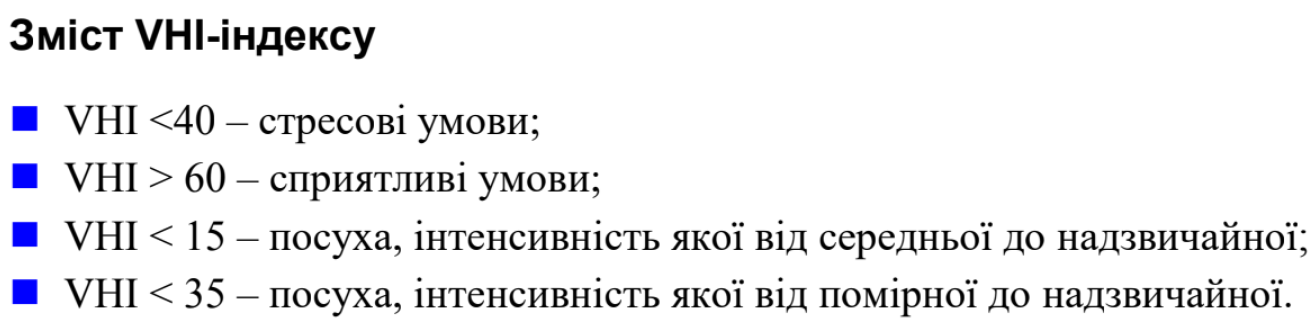

+ Ряд VHI за вказаний діапазон років для вказаних областей; виявити роки, протягом яких екстремальні посухи торкнулися більше вказаного відсотка областей по Україні (20% областей - 5 областей з 25);

In [6]:
def droughts(df, oblasti, diapazon, perc):
    roku = range(diapazon[0], diapazon[1]+1)
    vhi_row = df[(df["Area"].isin(oblasti)) & (df["Year"].isin(roku))]["VHI"]
    pc = (len(oblasti) * perc) // 100
    dr = df[(df["Area"].isin(oblasti)) & (df["Year"].isin(roku)) & (df["VHI"] < 15)]
    n = len(pd.unique(dr["Area"]))
    if n > pc:
        dr_years = str(pd.unique(dr["Year"]))
    else:
        dr_years = "None "
    return vhi_row, dr_years, dr

dd = droughts(df, [1, 2, 3, 10, 13], [1991, 2004], 20)

print("VHI:")
print(dd[0])
print("_"*60)
print("Extreme drought(s):")
print(dd[1])
print("-"*60)
print(dd[2][["Year", "Week", "VHI", "Area"]])

VHI:
457      27.59
458      31.77
459      35.51
460      39.04
461      39.52
         ...  
26858    56.44
26859    56.01
26860    54.29
26861    55.56
26862    57.24
Name: VHI, Length: 3450, dtype: float64
____________________________________________________________
Extreme drought(s):
[2000 1999]
------------------------------------------------------------
      Year  Week    VHI  Area
3092  2000    44  12.51     2
3093  2000    45  10.60     2
3094  2000    46  11.20     2
3095  2000    47  12.32     2
3096  2000    48  14.65     2
5189  1999    50  14.54     3
5190  1999    51  13.54     3
5191  1999    52  12.88     3
5233  2000    42  14.89     3
5234  2000    43  12.76     3
5235  2000    44   7.81     3
5236  2000    45   6.49     3
5237  2000    46   6.58     3
5238  2000    47   6.71     3
5239  2000    48   7.56     3
5240  2000    49   9.25     3
5241  2000    50  10.94     3
5242  2000    51  12.28     3


+ Аналогічно для помірних посух.

In [7]:
def medium_droughts(df, oblasti, diapazon, perc):
    roku = range(diapazon[0], diapazon[1]+1)
    vhi_row = df[(df["Area"].isin(oblasti)) & (df["Year"].isin(roku))]["VHI"]
    pc = (len(oblasti) * perc) // 100
    dr = df[(df["Area"].isin(oblasti)) & (df["Year"].isin(roku)) & (df["VHI"] >= 15) & (df["VHI"] < 35)]
    n = len(pd.unique(dr["Area"]))
    if n > pc:
        dr_years = str(pd.unique(dr["Year"]))
    else:
        dr_years = "None "
    return vhi_row, dr_years, dr

ddm = medium_droughts(df, [1, 3, 10], [2000, 2001], 80)

print("VHI:")
print(ddm[0])
print("_"*60)
print("Medium drought(s):")
print(ddm[1])
print("-"*60)
print(ddm[2][["Year", "Week", "VHI", "Area"]])

VHI:
906      30.96
907      32.40
908      34.26
909      36.86
910      37.50
         ...  
20292    65.06
20293    63.68
20294    58.89
20295    54.96
20296    54.17
Name: VHI, Length: 312, dtype: float64
____________________________________________________________
Medium drought(s):
[2000 2001]
------------------------------------------------------------
       Year  Week    VHI  Area
906    2000     1  30.96     1
907    2000     2  32.40     1
908    2000     3  34.26     1
948    2000    43  32.23     1
949    2000    44  26.58     1
950    2000    45  21.90     1
951    2000    46  20.97     1
952    2000    47  22.85     1
953    2000    48  25.17     1
954    2000    49  27.76     1
955    2000    50  29.01     1
956    2000    51  30.24     1
957    2000    52  32.87     1
5192   2000     1  18.21     3
5193   2000     2  23.11     3
5194   2000     3  25.44     3
5195   2000     4  29.79     3
5196   2000     5  33.29     3
5199   2000     8  33.57     3
5200   2000     9 